In [7]:
import numpy as np
import torch
import matplotlib.pyplot as plt

from model.nets import Siren
from model.flow import PipeFlow2D

In [8]:
Pn = [  complex(-0.5060,0.1245),
        complex(0.0802,0.0886),
        complex(0.0591,0.0251),
        complex(0.0228,0.0244),
        complex(0.0141,0.0071),
        complex(0.0112,0.0107),
        complex(0.0065,0.0056),
        complex(0.0067,0.0050),
        complex(0.0030,0.0040),
        complex(0.0044,0.0030),
        complex(0.0000,0.3710),
        complex(0.1493,0.0754),
        complex(0.0161,0.0103),
        complex(0.0166,0.0082),
        complex(-0.0002,0.0046),
        complex(0.0063,0.0001),
        complex(0.0008,0.0013),
        complex(0.0021,-0.0012),
        complex(0.0009,0.0015),
        complex(0.0001,-0.0001)]
pipe = PipeFlow2D(Po=-0.05,Pn=[complex(1,0.3),complex(-0.5,0.6),complex(0.1,0.1)],Wo=5)

In [9]:
Nx = 32
Nt = 32
x,y,t = np.meshgrid(np.linspace(0,8,4*Nx),np.linspace(-1,1,Nx),np.linspace(0,1,Nt))
u,v = pipe.velocity(x,y,t)
X = np.concatenate((x.reshape((Nx**2*4*Nt,1)),y.reshape((Nx**2*4*Nt,1)),t.reshape((Nx**2*4*Nt,1))),axis=1)
U = np.concatenate((u.reshape((Nx**2*4*Nt,1)),v.reshape((Nx**2*4*Nt,1))),axis=1)
X = torch.from_numpy(X).float().cuda()
U = torch.from_numpy(U).float().cuda()

In [10]:
net = Siren(in_features=3, out_features=2, hidden_features=256, 
                  hidden_layers=3, outermost_linear=True)
net.cuda()

Siren(
  (net): Sequential(
    (0): SineLayer(
      (linear): Linear(in_features=3, out_features=256, bias=True)
    )
    (1): SineLayer(
      (linear): Linear(in_features=256, out_features=256, bias=True)
    )
    (2): SineLayer(
      (linear): Linear(in_features=256, out_features=256, bias=True)
    )
    (3): SineLayer(
      (linear): Linear(in_features=256, out_features=256, bias=True)
    )
    (4): Linear(in_features=256, out_features=2, bias=True)
  )
)

In [11]:
total_steps = 1000

optim = torch.optim.Adam(lr=1e-4, params=net.parameters())

for step in range(total_steps):
    Up, X = net(X)    
    loss = ((U - Up)**2).mean()

    optim.zero_grad()
    loss.backward()
    optim.step()
    
    print("Loss " + str(step) + ": " + str(loss.item()))

Loss 0: 0.295706182718277
Loss 1: 0.2884945273399353
Loss 2: 0.2796788513660431
Loss 3: 0.27134373784065247
Loss 4: 0.2594968378543854
Loss 5: 0.24297262728214264
Loss 6: 0.22606879472732544
Loss 7: 0.2031167447566986
Loss 8: 0.1786538064479828
Loss 9: 0.15179184079170227
Loss 10: 0.1289442628622055
Loss 11: 0.10935808718204498
Loss 12: 0.09760145843029022
Loss 13: 0.0900161862373352
Loss 14: 0.08491471409797668
Loss 15: 0.07821659743785858
Loss 16: 0.07013107091188431
Loss 17: 0.06237330287694931
Loss 18: 0.05802071839570999
Loss 19: 0.056047771126031876
Loss 20: 0.05270849168300629
Loss 21: 0.04780445992946625
Loss 22: 0.043687980622053146
Loss 23: 0.0408564992249012
Loss 24: 0.037460826337337494
Loss 25: 0.033583223819732666
Loss 26: 0.03022909350693226
Loss 27: 0.02802870236337185
Loss 28: 0.026067757979035378
Loss 29: 0.02391275204718113
Loss 30: 0.022001149132847786
Loss 31: 0.02053634077310562
Loss 32: 0.018847212195396423
Loss 33: 0.01709115505218506
Loss 34: 0.0156863629817962

Loss 263: 0.00012670460273511708
Loss 264: 0.00013784172188024968
Loss 265: 0.00013909375411458313
Loss 266: 0.00012189641711302102
Loss 267: 0.0001341149618383497
Loss 268: 0.00012890157813671976
Loss 269: 0.00011900650861207396
Loss 270: 0.00012882184819318354
Loss 271: 0.00012192050053272396
Loss 272: 0.00011644131882349029
Loss 273: 0.00012340734247118235
Loss 274: 0.00011705038195941597
Loss 275: 0.00011368031846359372
Loss 276: 0.00011848114081658423
Loss 277: 0.00011337960313539952
Loss 278: 0.00011079345131292939
Loss 279: 0.00011419503425713629
Loss 280: 0.00011044961865991354
Loss 281: 0.00010798203584272414
Loss 282: 0.00011040584649890661
Loss 283: 0.00010796588321682066
Loss 284: 0.00010539961658651009
Loss 285: 0.0001069569552782923
Loss 286: 0.00010566791024757549
Loss 287: 0.00010312384983990341
Loss 288: 0.00010381652100477368
Loss 289: 0.0001034242013702169
Loss 290: 0.00010115998884430155
Loss 291: 0.00010099049541167915
Loss 292: 0.00010113483585882932
Loss 293: 9.9

Loss 517: 4.278452615835704e-05
Loss 518: 4.262962465872988e-05
Loss 519: 4.246917524142191e-05
Loss 520: 4.229105616104789e-05
Loss 521: 4.212514613755047e-05
Loss 522: 4.197352973278612e-05
Loss 523: 4.181192343821749e-05
Loss 524: 4.1643535951152444e-05
Loss 525: 4.148737571085803e-05
Loss 526: 4.133715992793441e-05
Loss 527: 4.117875505471602e-05
Loss 528: 4.101924059796147e-05
Loss 529: 4.086891203769483e-05
Loss 530: 4.0720893593970686e-05
Loss 531: 4.0567509131506085e-05
Loss 532: 4.0414925024379045e-05
Loss 533: 4.026879832963459e-05
Loss 534: 4.012388671981171e-05
Loss 535: 3.99757809645962e-05
Loss 536: 3.9828766603022814e-05
Loss 537: 3.968628152506426e-05
Loss 538: 3.954491694457829e-05
Loss 539: 3.940180977224372e-05
Loss 540: 3.9259532059077173e-05
Loss 541: 3.912041211151518e-05
Loss 542: 3.898269642377272e-05
Loss 543: 3.884426405420527e-05
Loss 544: 3.8706231862306595e-05
Loss 545: 3.857040064758621e-05
Loss 546: 3.8436199247371405e-05
Loss 547: 3.830196874332614e-05
L

Loss 772: 2.5251141778426245e-05
Loss 773: 2.5131599613814615e-05
Loss 774: 2.506727287254762e-05
Loss 775: 2.4971090169856325e-05
Loss 776: 2.4857294192770496e-05
Loss 777: 2.4788492737570778e-05
Loss 778: 2.4698747438378632e-05
Loss 779: 2.4597655283287168e-05
Loss 780: 2.4517165002180263e-05
Loss 781: 2.4437918909825385e-05
Loss 782: 2.4344959456357174e-05
Loss 783: 2.425765160296578e-05
Loss 784: 2.4185497750295326e-05
Loss 785: 2.4097596906358376e-05
Loss 786: 2.4010863853618503e-05
Loss 787: 2.393866452621296e-05
Loss 788: 2.385697007412091e-05
Loss 789: 2.377373857598286e-05
Loss 790: 2.369817411818076e-05
Loss 791: 2.3622978915227577e-05
Loss 792: 2.3543278075521812e-05
Loss 793: 2.3465818230761215e-05
Loss 794: 2.339451020816341e-05
Loss 795: 2.3318236344493926e-05
Loss 796: 2.3241733288159594e-05
Loss 797: 2.317102553206496e-05
Loss 798: 2.309834053448867e-05
Loss 799: 2.302450593560934e-05
Loss 800: 2.2953130610403605e-05
Loss 801: 2.2883385099703446e-05
Loss 802: 2.28124972

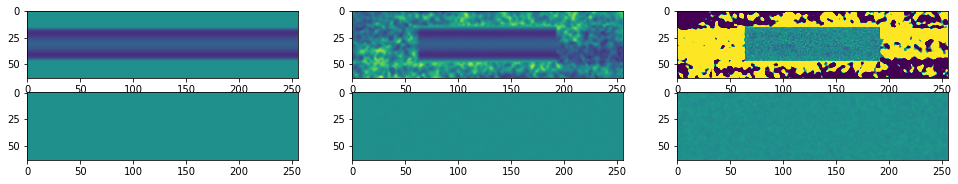

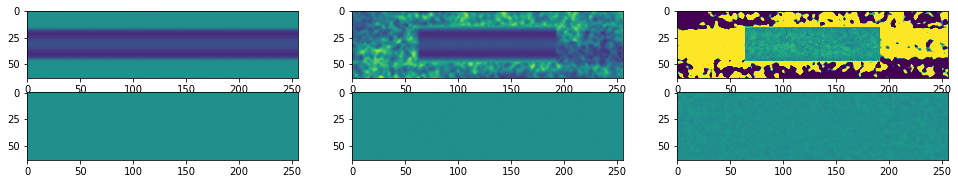

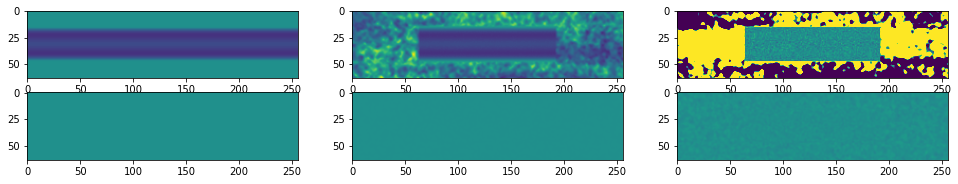

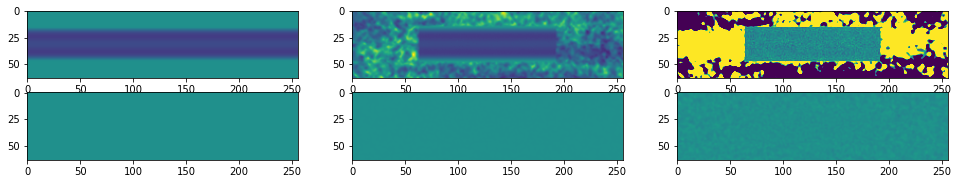

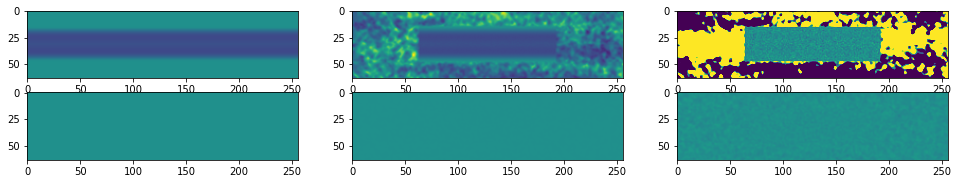

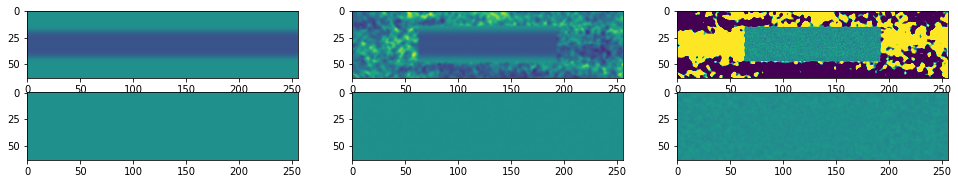

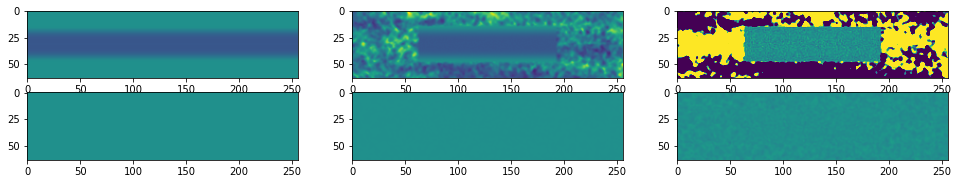

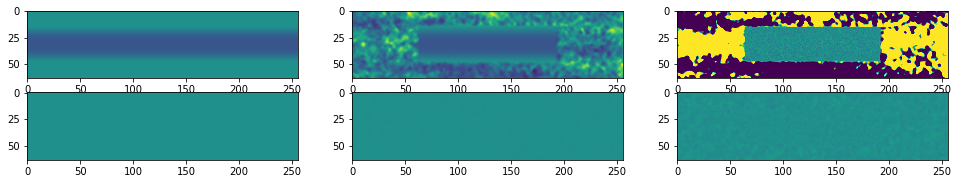

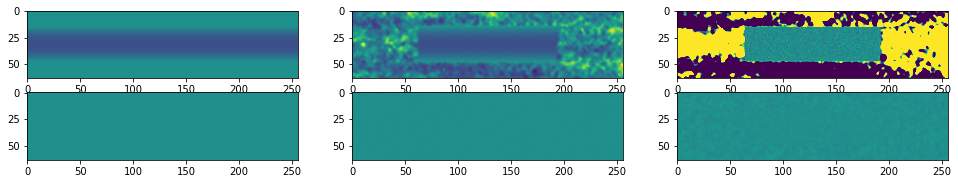

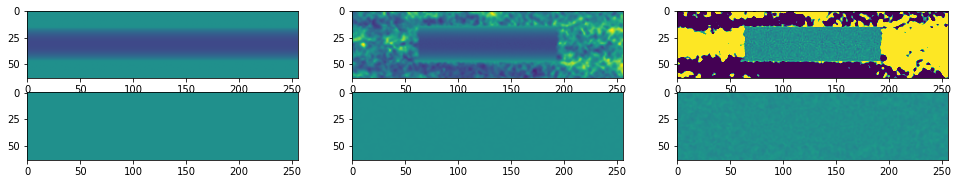

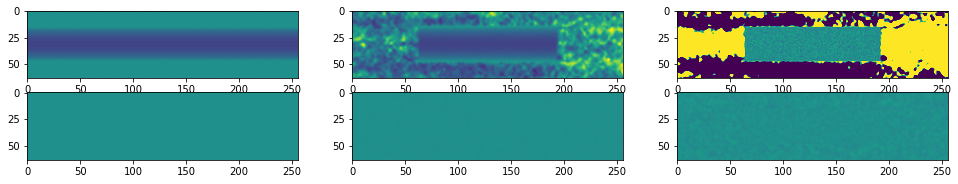

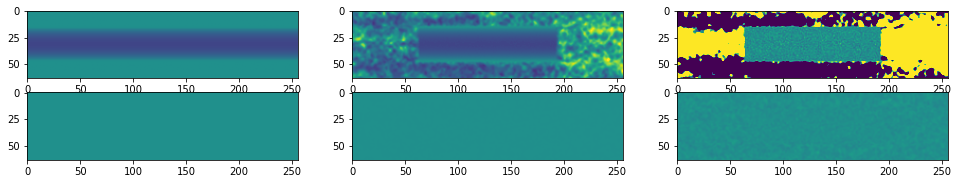

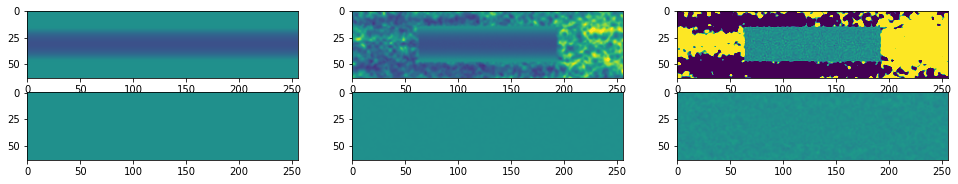

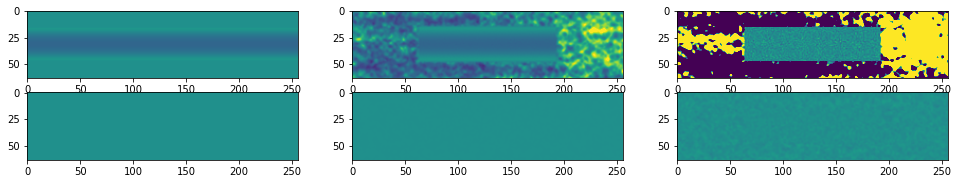

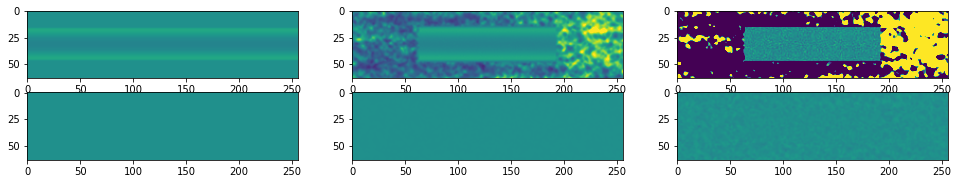

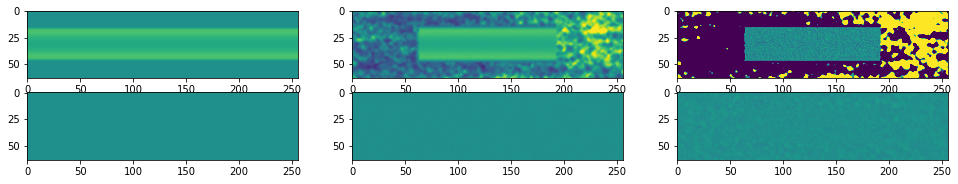

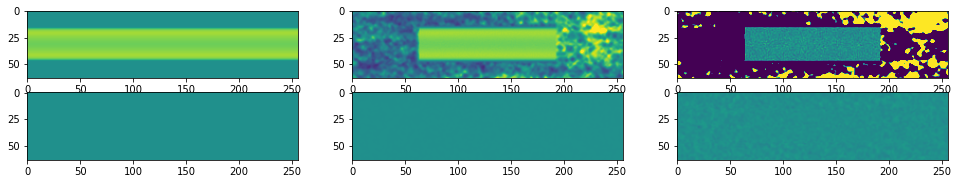

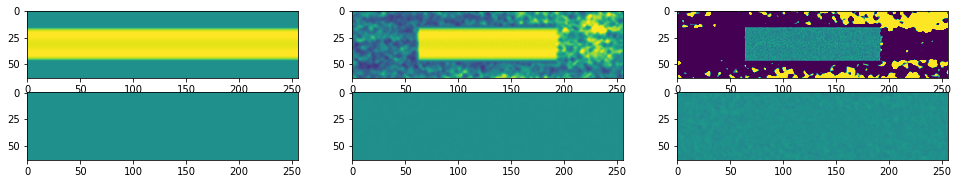

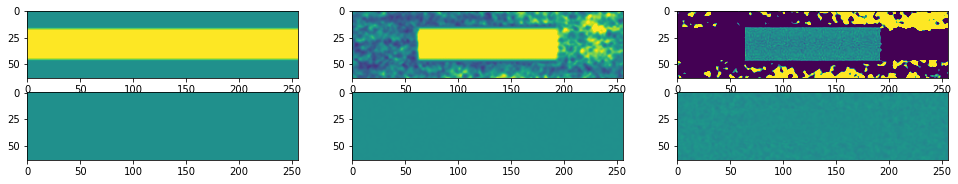

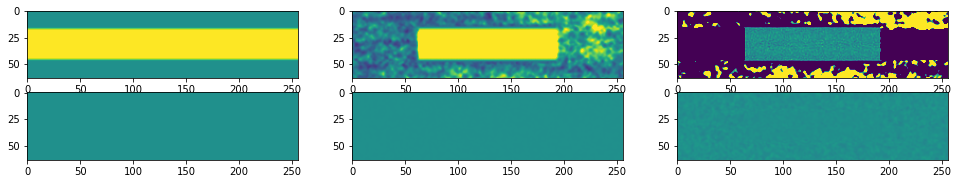

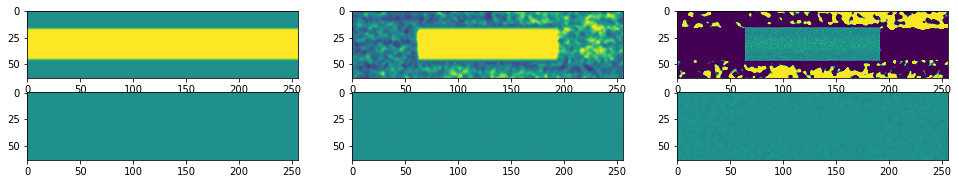

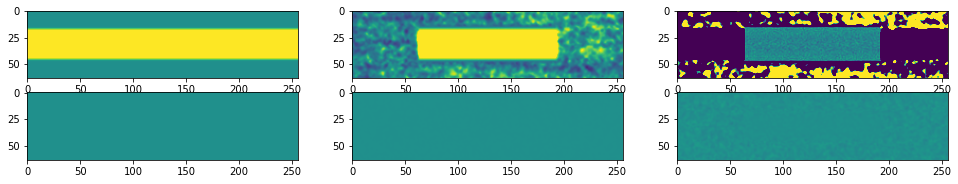

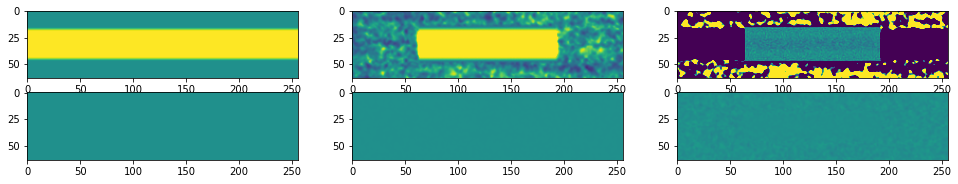

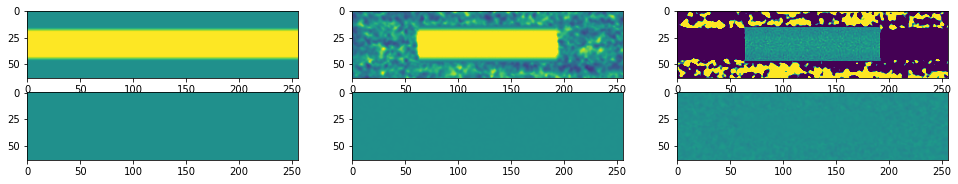

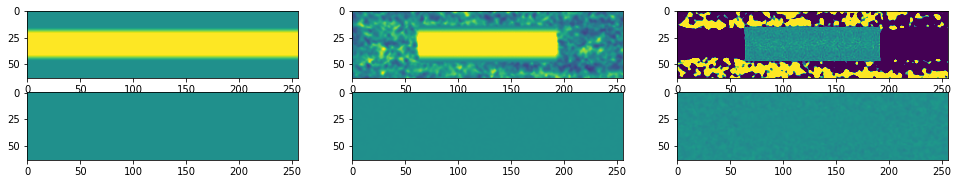

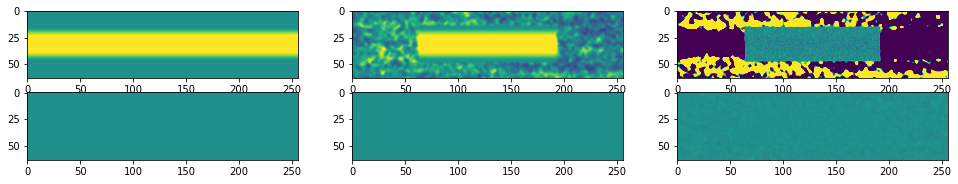

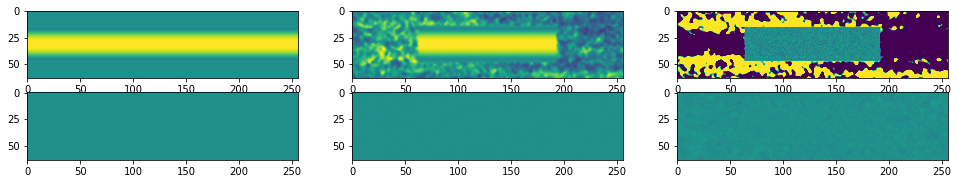

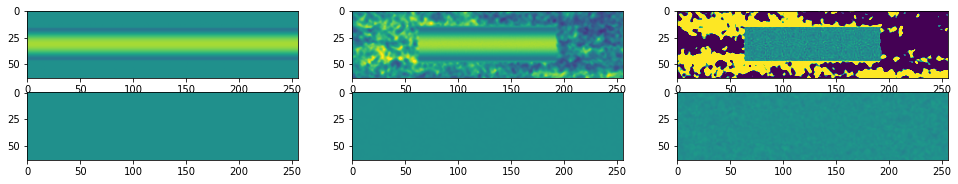

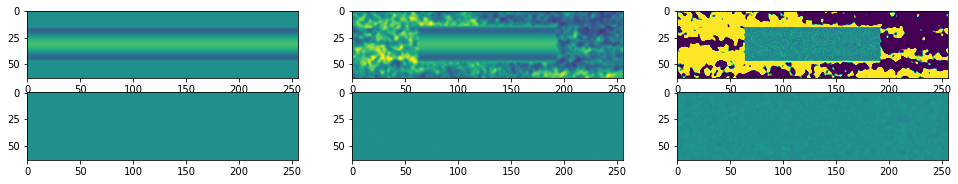

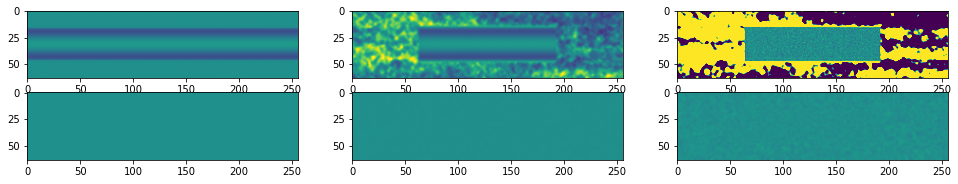

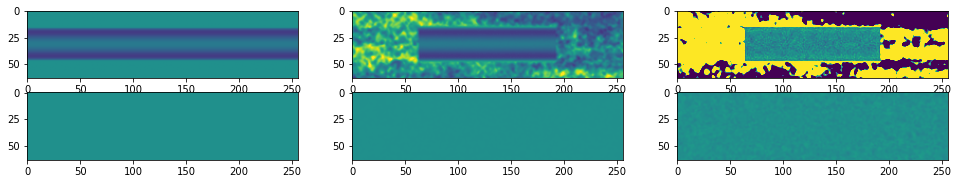

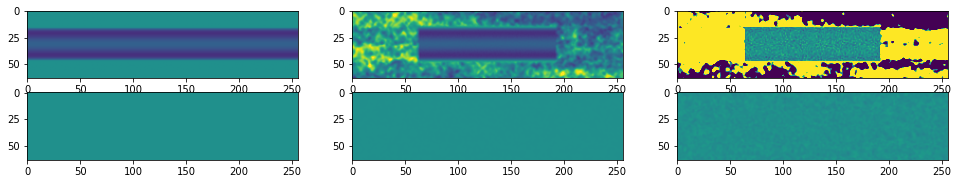

In [12]:
Nxt = 64
Ntt = Nt
xt,yt,tt = np.meshgrid(np.linspace(-4,12,4*Nxt),np.linspace(-2,2,Nxt),np.linspace(0,1,Ntt))
ut,vt = pipe.velocity(xt,yt,tt)
Xt = np.concatenate((xt.reshape((Nxt**2*4*Ntt,1)),yt.reshape((Nxt**2*4*Ntt,1)),tt.reshape((Nxt**2*4*Ntt,1))),axis=1)
Xt = torch.from_numpy(Xt).float().cuda()
Upt,Xt = net(Xt)

Upt = Upt.cpu().detach().numpy().reshape((Nxt,4*Nxt,Ntt,2))
upt = Upt[:,:,:,0]
vpt = Upt[:,:,:,1]
for tn in np.arange(Nt):
    fig, axes = plt.subplots(2,3, figsize=(16.5,2.75))
    axes[0,0].imshow(ut[:,:,tn],vmin=-1,vmax=1)
    axes[0,1].imshow(upt[:,:,tn],vmin=-1,vmax=1)
    axes[0,2].imshow(upt[:,:,tn]-ut[:,:,tn],vmin=-0.05,vmax=0.05)
    axes[1,0].imshow(vt[:,:,tn],vmin=-1,vmax=1)
    axes[1,1].imshow(vpt[:,:,tn],vmin=-1,vmax=1)
    axes[1,2].imshow(vpt[:,:,tn]-vt[:,:,tn],vmin=-0.05,vmax=0.05)
    
    plt.show()